### **HTTP**

In [ ]:
# 어제 데이터 수집을 위한 정규식을 배웠음

In [ ]:
# 본격적으로 데이터를 수집하기 위해서 HTTP에 대해 배워보자
# 웹 브라우저 -> 클라이언트(크롬, 인터넷 익스플로러 등)
# 데이터를 제공하는 쪽이 '서버' -> 서버 안에도 '웹 서버'가 존재(우리의 요청에 응답하는 곳). 별도의 API나 다른 곳에 존재하는 서버도 있음
# 웹 서버에는 별도의 데이터베이스 시스템도 달려있음.
# 일반적으로 브라우저에서 모든 작업이 이루어짐 -> 사용자의 요청을 서버로 보내고 -> 서버로 받은 응답을 화면에 그림
# 브라우저가 여러 개 있는 것은, 화면을 어떻게 그릴까가 다르고 성능에 영향을 미치는 물리적 역량이 다르기 떄문.
# 웹 브라우저는 HTTP를 통해 서버로 요청을 보냄
# 서버는 우리의 요청을 해석하고 거기에 맞춰 응답을 보낼 수 있는 웹 서버가 있음. - 아파치, 엔진X, 노드JS 등등
# TCP/IP 는 항상 '요청과 응답의 쌍'으로 구성되어 있음.
# 시스템이 거대해지면 DB는 별도의 독립적 서버에 두기도 함.
# 우리의 요청에 따라 웹 서버, 서버 쪽 프로그래밍 단에서 DB를 거쳐 데이터를 들고올 것.
# 서버단에 접근해서 우리 요청에 대한 응답을 받는 것. 중요한 정보들은 DB에 있으니 적절한 '파라미터'를 줘서 들고와야함
# 그것이 우리가 HTTP를 통한 크롤링을 하기 위해서 필요한 절차
# 실질적으로 웹 또는 앱 형태의 CS(client 와 server, 정보 요청과 정보 제공) - 실질적 서버를 위해서는 다 알고 있어야 함

In [ ]:
# HTTP 를 통해서 주고 받는 규약에는 뭐가 있을까?
# HTTP(하이퍼텍스트로 구성된 문서를 주고받아야 함) - 웹 서버가 어떤 언어를 쓰든지 간에 모두 HTTP를 통신하기 때문에 우리가 응답받는 데이터의 형태는 무조건 #! HTML
        # -> HTTP를 통해서 응답하기 떄문에. 따라서 HTML을 정확히 해석할 줄 알아야 함.
        # 그렇다면 서버의 위치는 어떻게 알까?
        # 표준 형태의 주소(파일까지 써논 형태를 URL, 서비스까지만 쓴 형태는 URI)
        # [http(어떤 프로토콜로 통신?)]://[www.example.com(서버의 주소 물리적인 위치. Path는 아님. 루트위치 정확한 것은 example.com)]:
        # [80](포트, 예약된 것들이 여러개 있음.)[/index.html](파일, 루트위치로부터 어디에 있는지. URL임)
        # TCP/IP 는 '핑'을 보내면 '퐁'을 줌. 요청을 보내면 응답을 보낸다는 것만 알면 됨
# HTML, URL 을 다 알아야 함
# 크롤러 - http, https에서 동작함. 반드시 알아야 하는 것은 위 형태의 주소(https://www.example.com:80/index.html)로만 접근 가능. 
# 해당 페이지에 접근 했을 때 다음 페이지로 넘어갈 때의 주소도 저것과 같이 만들어줘야 함.
# 절대주소/상대주소 - 풀 네임의 주소로 만들어줘야 함(항상)

# 정규식을 배운 이유는 스키마(프로토콜, http 등), 웹서버주소, 파일경로 등등 조합할 수 있기 떄문
# 거의 모든 서버들은 index.html을 가지고 있음. 뒤에 파일이 없어도 기본으로 이것을 먼저 찾음(항상) -> 그것이 바로 기본적으로 사이트에 방문했을 때 출력되는 곳

In [ ]:
# 그러면 우리가 이제 서버쪽으로 요청을 보낼 것(request 보낸다고 함)
# 모든 형태의 파일, 통신은 Header를 먼저 날림
# Header에 이 파일의 사이즈가 몇이고 이런 것을 해놓음.
# 즉 요청을 위해서는 request의 Header가 필요함. 그리고 필요하면 parameter를 보낼 때 BODY를 사용. BODY는 optional
# 그 동안은 브라우저가 알아서 해줫음.
# 그러나 우리는 코드레벨에서 올바르게 작성하고 HTTP를 통해서 HTML을 응답받을 수 있음

In [ ]:
# Header에 반드시 기입되어야 하는 정보는 무엇이 있을까?
# 메소드(내가 어떤 형태로 데이터를 요청했는지) - 'Get' 방식으로 요청. /로 시작하면 항상 루트. HTTP규약 중 /1.1 버전으로 요청
# 기본적으로 텍스트, 파일의 형식 html -> 이런 것을 미메 라고 부름. 앞에서부터 우선순위. 기본적으로 text의 html이고, */* 은 다른 형식도 받겠다는 것
# charst - 캐릭터셋. 콤마는 앞에서부터 우선순위. ISO-8859-1(라틴) 을 쓰면 한글이 꺠질수도 있음
# user-agent(나의 자격신원정보) -> 여기에 잡다한 것이 더 붙음. 나의 OS, OS.version 등등
# connection - 우리가 신경 안써도 됨

# BODY는 내가 전달하고 싶은 parameter를 전달할 것.
#! 알아야 할 것은 요청을 보낼때 요청을 보내는 형식이 있는데 그 형식이 HEAD와 BODY로 구분. BODY는 선택적 사용(Optional). 이것만 기억

In [ ]:
# HTTP 로 보낼 수 있는(요청) 메소드의 종류들.
# 어떤 메소드로 접근하느냐에 따라서 동일한 곳에서 다양한 방식의 작업이 가능함.
# 메소드마다 정해진 역햘이 예약어처럼 있음
# Get 은 select과 비슷함. 정보조회. 일반적으로 웹 브라우저에서 사용하는 방식(클릭)은 다 GET 방식
# 회원가입 같은 경우, 무엇을 기입해서 실제 상대방 서버에 등록되는 요청을 해야하는 경우 그럴 떄 POST 방식을 씀
# GET, POST 정도 알고 있으면 됨. 해 볼 수 있는 것 중에 REST는 CRUD(CREATE, READ, UPDATE, DELETE)과 유사함
# REST.api, RESTful.api(기능을 조금 분할 시켜 놓은 것) -> 서버를 이렇게 구성해서 서버단의 프로그래밍을 해본 적 있는지
# REST API 란, 클라이언트가 서버 데이터에 엑세스하는데 사용될 수 있는 GET, PUT, DELETE 등의 함수 집합.

# 주소가 URI라면 서비스에 주소가 있기 때문. URL이면 파일이어야 함. 서비스의 주소를 메소드를 뭘로 요청했느냐에 따라서 응답을 다르게 하는 것
# 이게 되려면 앞에 강력한 보안정책이 필요함(GET은 select라 상관 없음). 데이터를 업데이트하거나 삭제하는 구문은 강력한 보안정책이 없으면 이걸로 실제 DB에 반영될 수도 있음.
# 500, 503 에러를 많이 볼 것. - 디도스(분산된 도스) 공격인 줄 알고 서버를 막기 때문.

In [ ]:
# '메소드'만 보고서 이 URI가 어떻게 동작할 지 예상할 수 있도록.
# 메소드를 눈여겨 봐야함 -> 이 요청이 어떤 결과를 가져올 지 예상할 수 있을 것

##### web browser 의 요청-응답 과정

In [ ]:
# 이 말로 설명했던 과정들을 실제 웹 브라우저가 어떻게 실행하는지 한 번 보자
# 브라우저가 UX가 됐건 요청을 보내는 결과는 풀 주소로 보냄.

In [ ]:
# 요청
# 쿠키, referer(이 요청이 어디서부터 왔는지, 불법경로로 왔는지 판단)
# 이런 정보를 브라우저가 기입을 해서 Header에 심어서 보냄
# 우리는 브라우저를 안쓰니까 여기 기입된 정보를 다 조작 가능 (코드로 하기 때문)
# user-agent(사용자 권한) 하면 코드로 접근했기 때문에 다 비어 있음. 그래서 우리가 기입해서 바꿔줄 것

In [ ]:
# 응답
# 그러면 서버는, 이 사람이 정상적 사용자고 접근권한이 있다고 판단하면,
# 그 결과를 똑같이 Header와 Body로 구성된 HTML 문서를 통해 응답을 받음
# content-type => 기억해야 함! text/html (html은 데이터 포멧)
# status => 값을 기억해야 함. 200은 OK를 뜻함. 즉 정상적으로 응답했다는 것
# content-length => 여기서 나타나는 값은 바이트 단위. 즉 새로고침 할 때마다 만자리의 바이트 즉 메가 단위로 계속 나감
# x(extension) 글자가 붙는 애들은 정책들, 사이트에서 사용하는 키값들이 쭉 붙음

In [ ]:
# 응답을 받았기 때문에 우리 브라우저는,
# 바이트 타입으로 넘어온 응답을 텍스트로 변환(UTF-8을 이용)(디코딩)
# 그러고 html 문서를 parsing(분해 후 구조 파악) 함. 그러면 html(구조화 문서)에 따라 어떤 구조로 어떤 내용이 어디로 들어가는지 알 수 있음 
# 이후 css(규칙 기반 언어) 받음
# 이후 렌더링(개발자 도구에서 보이는 것)을 하고 끝나면 우리가 보는 화면이 나옴(시작페이지)
# 이중에 일부 하나라도 구멍이 나면 흰색 혹은 빵꾸 남

In [ ]:
# 이 과정을 우리가 알았으니, 코드를 통해서 똑같이 접근해보자.
# 우리는 브라우저를 안쓰기 때문에 우리의 요청을 우리가 직접 만들어줘야 하고, 서버의 응답 결과를 해석해 줘야 함
#! 결국에는 요청과 응답이 중요함!!

##### Legal Issues

In [ ]:
# 기본 규칙을 알았으니 TCP/IP와 http를 통해 사이트에 요청을 보내고 응답을 받을 수 있음.
# 그러나 무조건 해도 되는 것인가?
# 왜 이야기를 하냐면, request-response 를 절차적으로 밟기 보다는 셀레니움으로 아웅거리는데 별로 좋지 않음
# 우리는 실제 코드레벨에서 접근함.
# 사실 셀레니움은 데이터 수집 용도가 아니고 자바스크립트와 웹페이지를 테스트하기 위한 용도임.
# http단을 써야함. http를 매핑하고 있는 URLlib 패키지, 그걸 다시 매핑하는 requests 라는 패키지.
# cookie, header를 조작해서 우리가 원하는 형태의 결과를 받아오는 연습들을 쭉 할 것.
# 우리가 받아오는 것은 http 니까 무조건 html 임.
# 어떻게 해석해서 우리가 어떻게 원하는 정보를 가져올 수 있을까를 숙달.

In [ ]:
# Opt-in vs Opt-out
# whitelist vs Blacklist
# 허용된 목록만 하세요 vs 여깄는 거 빼고 암묵적으로 허용
# 필수적으로 동의해야해. 계약했으니 정보를 가져가도 뭐라하지 마라.(SNS 등 회원가입), 명시된 것들에 명확히 동의해야 할 수 있는 것 => Opt-in 방식
# 무료로 제공하는 프리웨어들을 다운받으면 여러가지가 붙음. 명시적으로 거부 안했기 때문. 명시적으로 거부안하면(blacklist에 해당하는 게 없으면) 동의라고 여김 => Opt-out 방식
# 요새는 whitelist와 blacklist 가 혼용됨.
# 일반적으로 우리나라에서 웹, 데이터에 관련된 정책들은 어떤 방식을 따를까? -> 서비스를 생각해보면 됨.
# 다른 사람이 이용할 형태의 플랫폼이나 서비스가 있는지. SNS, Blog 등
# 우리나라는 기본적으로 Opt-out. 상대방이 명시하지 않는 한 가져다가 써도 된다는 것. -> 금연구역이 아니라 흡연구역이어야 함
# 상대방이 명시적으로 쓰지 않았으면 데이터를 가져다가 써도 됨

In [ ]:
# 사익이 아니라 공익이라면 가져다 써도 됨.
# 트래픽 / 이용방침(약관) / 개인정보 / 지적재산권
# 너무 많은 request를 보내지 않도록 delay 를 줄수도 있음.

In [ ]:
# 코드를 가지고 접근할 때 각 사이트의 'robots.txt' 에 대한 것을 확인해야 함.
# 'robots.txt'가 존재하지 않으면 opt-out에 따라 그냥 가져가고 어느 사이트에서 가져왔는지 기술해놔야 함.

In [ ]:
# robots.txt의 내용
# /search 가 검색결과
# Allow : /$ 는 /로 끝나는 것. 별 얻을 것은 없을 것(서비스라서)

In [ ]:
# seu - 검색 봇이 왔을 때 내 사이트의 내용을 잘 가졀 수 있게 해주는 것

In [ ]:
# 어떤 '사이트'를 수집하느냐 보다는, 어떤 '데이터'를 수집하느냐가 문제!
# 2-5 는 사람이 해석해야 함 - 우리는 나혼자 쓰고 사익이 없음. 연구용으로 쓰고 바로 폐기할 것.
# robots.txt 확인은 하는데 안되는 곳도 있음. 

In [ ]:
# whois.kisa 는 누가 도메인을 소유하고 있는지 알기 위해서 쓸 것.

### urllib

In [ ]:
# urllib 밑에 http 단이 있고 그 단은 TCP/IP 단을 물고 있음.
# 즉 urllib 은 그 중간에 존재함

In [ ]:
# urllib은 4가지로 구성
# urllib.request - URL을 열고 읽는 것
# urllib.error - 온갖 에러
# urllib.parse - URL을 파싱함(분해하고 구조를 파악)
# urllib.robotparser - robots.txt를 파싱하는데, 잘 안돌아감. 직접 만들 필요도 있음

# urllib.response - request와 쌍. 사실 urilib 것은 아님

In [1]:
from urllib import request

In [2]:
# robotparser
from urllib import robotparser

In [3]:
rp = robotparser.RobotFileParser('https://google.com/robots.txt')
rp.url

In [5]:
rp.read()
# 해당 url 로 request 해서 저 파일을 받아왔을 것

In [6]:
rp.can_fetch('*', '/') # root 에서부터 접근할 수 있나요? 내용이 워낙 많아서 잘 안돌아감.

False

In [7]:
rp = robotparser.RobotFileParser('https://www.korea.ac.kr/robots.txt')
rp.url

'https://www.korea.ac.kr/robots.txt'

In [8]:
rp.read()

In [9]:
rp.can_fetch('*', '/')

True

In [10]:
rp = robotparser.RobotFileParser('https://news.naver.com/robots.txt')
rp.url

'https://news.naver.com/robots.txt'

In [11]:
rp.read()
rp.can_fetch('*', '/')

False

In [12]:
rp.can_fetch('Yeti', '/main/imagemontage')
# bot 이름(첫번째 문자열 인자)을 바꾸면 허용 가능. 경로는 두번째 문자열 인자에 루트부터 시작하는 걸로 바꾸면 됨
# Yeti 는 네이버 자사 봇

True

In [13]:
rp = robotparser.RobotFileParser('https://docs.python.org/robots.txt')
rp.url

'https://docs.python.org/robots.txt'

In [14]:
rp.read()
rp.can_fetch('*', '/')

True

In [15]:
rp.can_fetch('*', '/release')  # 위 URL의 robots.txt 보면 불가하다고 나와있음

False

#### **request**

In [16]:
from urllib import request

In [17]:
from urllib.request import urlopen

In [ ]:
# parameter를 전달하는 방식은 GET과 POST가 다름
GET(BODY X -> params:queryString) #파라미터가 주소에 붙어서 길어짐.
POST(BODY O -> data) #URL 변화 없음

In [18]:
urlopen('https://www.google.com')

In [22]:
resp = urlopen('https://www.google.com')
# ca 붙은 애들이 인증서.
# http 단에서 알아서 해줄 것. 어떤 사이트는 사설 인증서를 발급받아야 하는 것도 있음. 우리는 기본값 두면 됨
# data 는 GET 말고 POST 방식에서 필요
# 지금은 GET 방식 사용 -> URL 만 있으면 됨
# 응답을 하나 리턴함

In [ ]:
urlopen -> request 요청을 보낸 것.
urlopen의 return은 "response 객체"
여기에는 packet 들이 쪼개져 있던 것들을 합쳐놓고 cache: 캐싱(읽었으니 메모리로 보냄)
그래서 두 번째 읽으면 없는 것. 왜냐하면 이미 보냈기 때문
메모리에 올라간 주소를 기억하게 하기 위해 새로운 변수에 할당한 것


In [20]:
type(resp)
# 출력을 보면, urllib 이 아닌 그 밑의 단인 HTTP 에서 돌아온 '응답'임

http.client.HTTPResponse

In [21]:
# 응답 받은 html
resp.read()
# 결과가 b(리터럴) 로 시작함 -> 즉 문자열이 아니라 byte임. 문자열로 읽고 싶으면 decoding 해야 함

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="woMPzb9FzCTDuRRgkoXXfQ">(function(){window.google={kEI:\'dB0LZKnYAdvl2roPt_ShoAw\',kEXPI:\'0,18167,772936,568306,1709,4350,206,4804,2316,383,246,5,1129120,1624,1196139,638,165,5,302391,77529,16114,28682,22433,1361,12317,2817,14765,4998,13228,3847,38444,2872,2891,8349,3405,606,60690,6397,9359,3,576,6459,149,13975,4,1528,2304,42127,13658,4437,9358,7428,5830,2527,4094,7596,1,42154,2,14022,25739,6699,14866,1538,14719,4568,10,2,6246,17111,6307,1252,5835,14968,4332,19,7465,445,2,2,1,6960,19672,8155,6682,699,15970,872,19634,7,1922,5784,3995,18543,2847,389,14375,6305,2007,18192,15605,4531,14,82,20206,1622,1779,669,3230,1077,3940,8526,663,1762,8481,991,2266,764,426,5685,1410,23,867,160,2525,55,5965,504,567,6980,68

In [24]:
resp.read()
# 요청에 대한 응답을 받고 온전히 읽어냄. 읽어냈기 때문에 데이터가 남아있는게 없어서 안 뜨는게 정상(flushing)
# 따라서 주소값을 가져와서 다른 변수에 담아줘야 계속 이용 가능

b''

In [23]:
body = resp.read()

In [24]:
type(body), type(body.decode('utf-8'))

(bytes, str)

In [ ]:
# 통신(TCP/IP)에서 사용되는 데이터는 항상 바이트스트림(bytes)
# 그러다보니 우리가 request-response 로 항상 주고받는 데이터는 byte
# Header에는 text/html이지만 항상 byte임
# 우리가 요청을 보내려면 텍스트를 바이트로 바꿔서 보내야 하고
# 받아온 것도 바이트를 string으로 바꿔서 받아야 함
# 영어는 문제가 없음. ASCII CODE이기 때문. 다른 언어들은 문제가 발생함. 특히 우리나라.
# 우리나라 표준코드는 4가지정도 있음. 그 중에서 대표적으로 euc-kr, utf-8 -> 이 때문에 글자 깨지고 안깨지고 발생함
# hexa(16진법)코드를 decimal(2진법)로 표현하는 방법이 유니코드일 때에는 데시멀 즉 바이트 단위가 더 커짐

In [25]:
body.decode('utf-8')
# &#45908;&#48372;$#44592; 이게 한글임
# utf-8을 써도 잘 안 읽히는 것을 확인할 수 있음.

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="JhSsMMUkV0k7kj3NGBeD0A">(function(){window.google={kEI:\'Qx8LZLnxD_GU2roPiNu7KA\',kEXPI:\'0,791104,512320,55985,6058,207,4804,2316,383,246,5,1129120,1197723,678,165,379925,16114,28683,22432,1361,283,12032,4750,12834,4998,13228,3847,38444,885,1987,2891,8349,3405,606,30668,19391,10631,15756,3,576,6460,148,13975,4,1528,2304,13383,28744,13658,4437,9358,7428,5821,2536,4097,7593,1,42154,2,14022,25739,5679,1020,31122,4568,6259,23418,1252,5835,14968,4332,19,4998,2467,445,2,2,1,26632,8155,7381,15970,873,19633,7,1922,5784,3995,20640,750,389,14375,6305,2007,18191,6050,14087,14,82,14710,5496,1622,1779,4976,3941,4107,330,6513,4097,4387,988,1536,1494,426,5203,482,1410,23,867,925,1760,55,4665,1804,567,4642,1040,103,1198,

In [26]:
resp.headers.items()
# 이게 우리가 URL 로부터 '응답'받은 header -> urlopen 의 리턴값으로 받아옴
# 우리는 표준시 +9시간
# ISO-8859-1 라틴 문자 -> 당연히 한글 깨짐
# gws -> google web server 하둡같은 애들
# set-cookie -> 쿠키를 설정하라는 header 정보의 메시지
# 쿠키를 이용해서 맞춤형 광고를 함. -> 그게 텍스트마이닝에서 하는 수익이 나는 서비스의 산출물 중 하나임

[('Date', 'Fri, 10 Mar 2023 12:14:59 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Content-Type', 'text/html; charset=ISO-8859-1'),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2023-03-10-12; expires=Sun, 09-Apr-2023 12:14:59 GMT; path=/; domain=.google.com; Secure'),
 ('Set-Cookie',
  'AEC=ARSKqsJxh2UBTlatn7CZq7SZ-l-sLL2e1HbtV6sfL0u4j4NWDPDjBtipItA; expires=Wed, 06-Sep-2023 12:14:59 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax'),
 ('Set-Cookie',
  'NID=511=s0mtJhu_Z3IAXzvaXlGjMMBXKNxrIV6YeanP5PZ79N2GGU0X78AufcnK66W4JzEjzi2lcfejUe3MglBASD_tBiHRZ_Ei4EKh80UJkzptxFJseP2l1E8N1-8ONEI-1XCbn1s8k4ojzlw-3qwrBTCpPNS1cFPvNfikPvv11VU2KQg; expires=Sat, 09-Sep-2023 12:14:59 GMT; path=/; domain=.google.com; HttpOnly'),
 ('Alt-Svc', 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'),
 ('Accept-Ranges', 'none'),
 ('Vary'

In [28]:
resp.reason, resp.status # 응답을 확인받은 것
# 정상적인 요청에 의해서 정상적인 응답을 받은 것.
# 코드와 메시지가 다르면 비 정상적인 상황인 것. 
# 이것을 항상 확인해줘야 함

('OK', 200)

In [29]:
resp = urlopen('https://www.google.com/search/about')
html = resp.read()  # 메모리에 넘어갔기 때문에 주소를 사용하기 위하여 할당
# 우리 수업에서는 공통된 검색어로 다 같이 같은지를 확인할 것

In [30]:
# 항상 확인! status값, URL로부터 온 응답
resp.status, resp.reason, resp.headers.items()

(200,
 'OK',
 [('Accept-Ranges', 'bytes'),
  ('Vary', 'Accept-Encoding'),
  ('Content-Type', 'text/html'),
  ('Content-Security-Policy-Report-Only',
   "script-src 'nonce-otlq6HhNtSHP6_K5XUx2cA' 'report-sample' 'strict-dynamic' 'unsafe-eval' 'unsafe-inline' http: https:; object-src 'none'; report-uri https://csp.withgoogle.com/csp/uxe-owners-acl/www_google; base-uri 'none'"),
  ('Content-Security-Policy-Report-Only',
   "require-trusted-types-for 'script'; report-uri https://csp.withgoogle.com/csp/uxe-owners-acl/www_google"),
  ('Cross-Origin-Resource-Policy', 'cross-origin'),
  ('Cross-Origin-Opener-Policy-Report-Only',
   'same-origin; report-to="uxe-owners-acl/www_google"'),
  ('Report-To',
   '{"group":"uxe-owners-acl/www_google","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/uxe-owners-acl/www_google"}]}'),
  ('Content-Length', '47041'),
  ('Date', 'Fri, 10 Mar 2023 12:24:01 GMT'),
  ('Pragma', 'no-cache'),
  ('Expires', 'Fri, 01 Jan 1990 00:00:00 

In [31]:
html

b'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n    <meta content="initial-scale=1, minimum-scale=1, width=device-width" name="viewport">\n\n    <title>Google Search - Stay in the Know with Your Google App</title>\n    <meta name="description" content="Your Google Apps keeps you in the know about the topics that interest you. Get timely updates and stories about your favorite sports teams, bands, movies, celebs, hobbies, and more, all in one place with the Google App.">\n\n    <meta property="og:url" content="https://www.google.com/search/about/">\n    <meta property="og:title" content="Google Search | About Google app">\n    <meta property="og:description" content="Your Google Apps keeps you in the know about the topics that interest you. Get timely updates and stories about your favorite sports teams, bands, movies, celebs, hobbies, and more, all in one place with the Google App.">\n    <meta property="og:site_name" content="Google Search | About Google app

In [ ]:
# 검색결과 활용 절대 안됨
https://www.google.com/search?q=%ED%95%9C%EC%86%8C%ED%9D%AC&rlz=1C5CHFA_enKR1044KR1044&oq=%ED%95%9C%EC%86%8C%ED%9D%AC&aqs=chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9&sourceid=chrome&ie=UTF-8
# 활용하면 에러 뜸 -> 403: Forbidden -> 나에게 권한이 없어서 출력되는 에러
# robots.txt 에서 모든 에이전트에 대해서 함부로 검색결과 가져가지 말라고 명시해둠.
# 상대방 서버에서 뱉은 것

In [47]:
#https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%95%9C%EC%86%8C%ED%9D%AC

resp = urlopen('https://www.google.com/search/about')
html = resp.read()

In [48]:
# 항상 확인!
resp.status, resp.reason, resp.headers.items()

(200,
 'OK',
 [('Accept-Ranges', 'bytes'),
  ('Vary', 'Accept-Encoding'),
  ('Content-Type', 'text/html'),
  ('Content-Security-Policy-Report-Only',
   "script-src 'nonce--uUNLDwJMgCQCsbSlPO4hQ' 'report-sample' 'strict-dynamic' 'unsafe-eval' 'unsafe-inline' http: https:; object-src 'none'; report-uri https://csp.withgoogle.com/csp/uxe-owners-acl/www_google; base-uri 'none'"),
  ('Content-Security-Policy-Report-Only',
   "require-trusted-types-for 'script'; report-uri https://csp.withgoogle.com/csp/uxe-owners-acl/www_google"),
  ('Cross-Origin-Resource-Policy', 'cross-origin'),
  ('Cross-Origin-Opener-Policy-Report-Only',
   'same-origin; report-to="uxe-owners-acl/www_google"'),
  ('Report-To',
   '{"group":"uxe-owners-acl/www_google","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/uxe-owners-acl/www_google"}]}'),
  ('Content-Length', '47041'),
  ('Date', 'Fri, 10 Mar 2023 02:45:45 GMT'),
  ('Pragma', 'no-cache'),
  ('Expires', 'Fri, 01 Jan 1990 00:00:00 

In [32]:
# 정상적으로 받았음을 확인
html # 이 메시지가 응답인 것

b'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n    <meta content="initial-scale=1, minimum-scale=1, width=device-width" name="viewport">\n\n    <title>Google Search - Stay in the Know with Your Google App</title>\n    <meta name="description" content="Your Google Apps keeps you in the know about the topics that interest you. Get timely updates and stories about your favorite sports teams, bands, movies, celebs, hobbies, and more, all in one place with the Google App.">\n\n    <meta property="og:url" content="https://www.google.com/search/about/">\n    <meta property="og:title" content="Google Search | About Google app">\n    <meta property="og:description" content="Your Google Apps keeps you in the know about the topics that interest you. Get timely updates and stories about your favorite sports teams, bands, movies, celebs, hobbies, and more, all in one place with the Google App.">\n    <meta property="og:site_name" content="Google Search | About Google app

In [33]:
html.decode('utf-8')

'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n    <meta content="initial-scale=1, minimum-scale=1, width=device-width" name="viewport">\n\n    <title>Google Search - Stay in the Know with Your Google App</title>\n    <meta name="description" content="Your Google Apps keeps you in the know about the topics that interest you. Get timely updates and stories about your favorite sports teams, bands, movies, celebs, hobbies, and more, all in one place with the Google App.">\n\n    <meta property="og:url" content="https://www.google.com/search/about/">\n    <meta property="og:title" content="Google Search | About Google app">\n    <meta property="og:description" content="Your Google Apps keeps you in the know about the topics that interest you. Get timely updates and stories about your favorite sports teams, bands, movies, celebs, hobbies, and more, all in one place with the Google App.">\n    <meta property="og:site_name" content="Google Search | About Google app"

In [ ]:
# header를 봐야하는 이유 중 하나는 'charset'(content-type의 인코딩 방식) 을 보는 것
# 다짜고짜 디코딩 하면 나중에 질문할 것.
# header로 캐릭터셋을 확인하고 거기에 맞는 디코딩 옵션을 줘야만 올바르게 풀림

In [34]:
# robots.txt 의 모든 에이전트에 내가 만든 봇이 속하지 않는다고 알려줄 수 있음
from urllib.request import Request
# 우리가 요청한 헤더는 못 봄. 응답받은 헤더는 urlopen을 통해서 위에서 봤음

In [35]:
urlopen()
# request 오브젝트 가능

TypeError: urlopen() missing 1 required positional argument: 'url'

In [ ]:
Request()
# headers={} 가 있음
# method 도 지정 가능

In [36]:
url = 'https://www.google.com/search?q=%ED%95%9C%EC%86%8C%ED%9D%AC&rlz=1C5CHFA_enKR1044KR1044&oq=%ED%95%9C%EC%86%8C%ED%9D%AC&aqs=chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9&sourceid=chrome&ie=UTF-8'
header = {
    'user-agent':'mybot'
}
req = Request(url, headers=header, method='GET')


In [37]:
resp = urlopen(req)  # 응답을 받아온 것

In [38]:
html = resp.read()

In [39]:
resp.headers['content-type'] # 응답 받은 html의 헤더에서 content-type 확인

'text/html; charset=ISO-8859-1'

In [40]:
html.decode('utf-8')   # 안되는 게 당연. 위 charst이 라틴문자이기 때문

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd7 in position 12449: invalid continuation byte

In [41]:
resp.headers['content-type']

'text/html; charset=ISO-8859-1'

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>&#54620;&#49548;&#55148; - Google &#44160;&#49353;</title><script nonce="_oxkEf_KiTJ3h5gPWJxIuA">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.
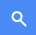
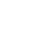
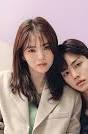
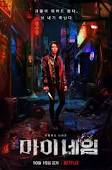
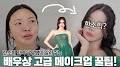

In [42]:
html.decode('ISO-8859-1') # 위 charset으로 그대로 디코딩 해줌

In [ ]:
# 문제가 되는 것은 디코딩했을 때 한글이 나와야 하는데 안나옴
&#44160; => 이게 문제
위 형식은 &#코드값; 처럼 이루어져 있음. => HTML entities -> 이미 예약된 값들
태그는 <> 시작 <> 끝
   ex. <head></head> -> HTML Tag
       여는태그  닫는태그          => 이게 마크업
마크업으로 기술된 문서를 html

xml -> 내가 데이터를 설명할 수 있게끔 백서를 구성하는게 가능함

html -> Not wellformed(지멋대로 쓸 수 있음)
=> <head> ?(닫는 태그 없을 수 있음)  => html에서는 오류 안남

xml 에서는 닫는 태그 없어서 오류남 (validation 지원)

<> <- 이 안에 들어가면 내용인지 태그인지 헷갈림

In [ ]:
&lt;  &gt;
 <     >  <- 여기 안에 16진 코드(헥사코드) 들어감. 실질적으로는 데시멀 형태로 되어 있어 헥사데시멀이라고 부름

In [ ]:
# 따라서 우리는
&#44160; 을 한글로 변화시켜야 함
# 여기까지 우리가 request 패키지 를 통해서 우리가 어떻게 요청했는지를 봤고,
# urlopen 에서 리턴값으로 받은 응답의 헤더에서 한글을 위해 디코딩 해줬는데 문제를 발견한 것임(한글이 깨짐)ㄴ

In [44]:
# 이를 해결 위해서 unescape 패키지를 활용할 수 있음
from html import unescape

In [45]:
unescape('&#44160;')
# 해당 코드에 대응되는 유니코드가 나옴

'검'

In [46]:
import re   # 정규식

In [ ]:
HTML 문서의 구조
        HEAD                     BODY
눈에 보이는게 아닌 메타정보     ->    내용, 구조
TITLE (브라우저 최상단에 제목으로 표시되는 내용)

In [88]:
# 구글 한소희 검색
re.search('<title>(.+)</title>', html.decode('ISO-8859-1'))

<re.Match object; span=(153, 218), match='<title>&#54620;&#49548;&#55148; - Google &#44160;>

In [47]:
# 내가 찾은 내용들 가져올 것
re.search('<title>(.+)</title>', html.decode('ISO-8859-1')).group(1)

'&#54620;&#49548;&#55148; - Google &#44160;&#49353;'

In [48]:
# 내가 찾은 내용들 가져올 것
title = re.search('<title>(.+)</title>', html.decode('ISO-8859-1')).group(1)

In [91]:
unescape(title)
# '&#54620;&#49548;&#55148; - Google &#44160;&#49353;' 를 유니코드로 변환한 값이 나옴
# 잘 안됐던 이유는 html 에 할당하기 전 두번 읽어서

'한소희 - Google 검색'

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>한소희 - Google 검색</title><script nonce="_oxkEf_KiTJ3h5gPWJxIuA">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};var h=func
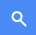
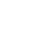
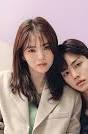
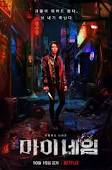
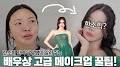

In [49]:
unescape(html.decode('ISO-8859-1'))
# html 을 디코딩한 결과를 한글로 바꾼 것

In [ ]:
# 여기까지 header보는 법, html 응답을 read 하는 법(byte로 가져옴), 헤더 에러 확인함.

##### parameter -> GET 방식: URL에 붙음

In [50]:
url

'https://www.google.com/search?q=%ED%95%9C%EC%86%8C%ED%9D%AC&rlz=1C5CHFA_enKR1044KR1044&oq=%ED%95%9C%EC%86%8C%ED%9D%AC&aqs=chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9&sourceid=chrome&ie=UTF-8'

In [ ]:
# GET 방식에서 parameter 전달하는 방식은 URL 주소에 씀
# URL 주소를 보면, 파라미터는 ? 뒤에 나옴. 그리고 key/value 쌍으로 쓰여 있음
# GET 방식 파라미터(쿼리스트링) 물음표(?) 뒤가 파라미터
# 각 파라미터는 & 기호로 연결되어있음
# 파라미터 내 key와 value는 '='로 구분되어 있음
https://www.google.com/search?  -> ? 뒤에 파라미터가 존재
q = %ED%95%9C%EC%86%8C%ED%9D%AC&   # q는 검색어를 나타냄
# q=에서 & 아래가 한글을 나타냄. 한글은 유니코드. 그런데 주고받는 모든 데이터는 바이트타입이어야 함. 그래서 16진수로 표현한 것
rlz = 1C5CHFA_enKR1044KR1044&
oq = %ED%95%9C%EC%86%8C%ED%9D%AC&
aqs = chrome.0.35i39j46i433i512j0i512j0i3j0i512l3j69i60.1206j0j4&
sourceid=chrome&
ie = UTF-8

# Body에서 parameter는 data 영역에 들어감
# 16진수 관련된 옵션이 아래에 있음

In [51]:
from urllib.parse import quote, quote_plus, unquote, unquote_plus
    quote('한소희'),           unquote('%ED%95%9C%EC%86%8C%ED%9D%AC')
  한글 -> 16진코드 (quote)               16진코드 -> 한글 (unquote)

('%ED%95%9C%EC%86%8C%ED%9D%AC', '한소희')

In [ ]:
# 즉, 검색어를 바꾸고 싶으면 -> 검색어 16진 코드로 바꿔서(quote) 위 q=에 넣으면 됨

In [52]:
quote('%ED%95%9C%EC%86%8C%ED%9D%AC')
# 위는 오픈API 에서 받은 키 값의 형태
# 즉, 이미 16진수로 풀어낸 key값을 다시 인코딩 해버린 경우.
# 그럴때는,

'%25ED%2595%259C%25EC%2586%258C%25ED%259D%25AC'

In [100]:
quote(unquote('%ED%95%9C%EC%86%8C%ED%9D%AC'))
# 이 방식으로 보내면 됨

'%ED%95%9C%EC%86%8C%ED%9D%AC'

In [ ]:
# 우리가 파라미터를 관리해야 하는데 파라미터가 무엇을 의미하는지는 모름
# 사이트마다 파라미터가 다름
# 검색어를 바꾸고 싶다고 해당 위치를 찾아 바꾸는 것은 노가다임.
# 사이트가 정해져있고, 파라미터를 쉽게 접근하기 위해서는 key/value 쌍으로 관리할 필요가 있음

In [ ]:
params = {
    'q': ,
    'rlz': ,
    'oq' : ,
    'aqs' : ,
    'sourceid' : ,
    'ie' : 
}
# 이처럼 관리하면 참 좋을 것. URL 에 심을 수 있으면 참 편리할 것
# q = %ED%95%9C%EC%86%8C%ED%9D%AC& 
# rlz = 1C5CHFA_enKR1044KR1044&
# oq = %ED%95%9C%EC%86%8C%ED%9D%AC&
# aqs = chrome.0.35i39j46i433i512j0i512j0i3j0i512l3j69i60.1206j0j4&
# sourceid = chrome&
# ie = UTF-8
# 누군가 만들어주면 편할텐데...

In [53]:
# 위와 관련된 것들
from urllib.parse import parse_qs, urlparse, urljoin, urlencode, urlunparse

In [54]:
urlparse(url)
# 6개의 tuple로 결과를 리턴해줌

ParseResult(scheme='https', netloc='www.google.com', path='/search', params='', query='q=%ED%95%9C%EC%86%8C%ED%9D%AC&rlz=1C5CHFA_enKR1044KR1044&oq=%ED%95%9C%EC%86%8C%ED%9D%AC&aqs=chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9&sourceid=chrome&ie=UTF-8', fragment='')

In [55]:
len(urlparse(url)), urlparse(url)
# 스키마(프로토콜), netloc(서버의 주소), path(어느 서비스 URI로 요청 보냈는지), query(그때의 쿼리스트링 - 여기에 GET 방식 파라미터가 들어감)

(6,
 ParseResult(scheme='https', netloc='www.google.com', path='/search', params='', query='q=%ED%95%9C%EC%86%8C%ED%9D%AC&rlz=1C5CHFA_enKR1044KR1044&oq=%ED%95%9C%EC%86%8C%ED%9D%AC&aqs=chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9&sourceid=chrome&ie=UTF-8', fragment=''))

In [56]:
urlunparse(urlparse(url))
# urlunparse는 인자로 components 필요.
# 그것이 url을 urlparse을 사용하여 튜플로 쪼갠 것이 됨.
# urlunparse 는 그 쪼갠 것들을 다시 이어붙혀 줌

'https://www.google.com/search?q=%ED%95%9C%EC%86%8C%ED%9D%AC&rlz=1C5CHFA_enKR1044KR1044&oq=%ED%95%9C%EC%86%8C%ED%9D%AC&aqs=chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9&sourceid=chrome&ie=UTF-8'

In [ ]:
# 우리는 파라미터를 바꾸려고 함.
# 주소를 바꾸려면 netloc, 파라미터를 바꾸고 싶으면 5번째인 query를 바꾸면 됨. 그러기 위해서 query를 parsing(분해 및 구조 파악)

In [57]:
# query를 parsing 하기 위하여 parse_qs 사용
# & 기준으로 파라미터들을 나누고, = 기준으로 키와 값을 나눔. 그리고 dict 형태로 저장
parse_qs(urlparse(url)[4])

{'q': ['한소희'],
 'rlz': ['1C5CHFA_enKR1044KR1044'],
 'oq': ['한소희'],
 'aqs': ['chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9'],
 'sourceid': ['chrome'],
 'ie': ['UTF-8']}

In [58]:
params = parse_qs(urlparse(url)[4])
# parse_qs는 key/value 쌍으로 쪼개줌

In [59]:
params.keys()

dict_keys(['q', 'rlz', 'oq', 'aqs', 'sourceid', 'ie'])

In [79]:
params['q'] = '태연'
# 검색어를 '태연'으로 바꾼 것

In [61]:
params

{'q': '태연',
 'rlz': ['1C5CHFA_enKR1044KR1044'],
 'oq': ['한소희'],
 'aqs': ['chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9'],
 'sourceid': ['chrome'],
 'ie': ['UTF-8']}

In [ ]:
# 이걸 가지고 검색에 이용하는 방법이 여러가지가 있음

In [76]:
params['q'] = quote('태연') # 여기서 quote 는 한글을 16진법으로 바꿔주는 것
params

{'q': '%ED%83%9C%EC%97%B0',
 'rlz': ['1C5CHFA_enKR1044KR1044'],
 'oq': ['한소희'],
 'aqs': ['chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9'],
 'sourceid': ['chrome'],
 'ie': ['UTF-8']}

In [77]:
urlencode(params)
# header의 get방식에서 파라미터를 전달하는 형식으로 바꿔줌.
# 한글도 16진코드로 바꿔서 조합해줌

'q=%25ED%2583%259C%25EC%2597%25B0&rlz=%5B%271C5CHFA_enKR1044KR1044%27%5D&oq=%5B%27%ED%95%9C%EC%86%8C%ED%9D%AC%27%5D&aqs=%5B%27chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9%27%5D&sourceid=%5B%27chrome%27%5D&ie=%5B%27UTF-8%27%5D'

In [67]:
type((urlencode(params), ))

tuple

In [68]:
urlparse(url)[0:4]+(urlencode(params),)

('https',
 'www.google.com',
 '/search',
 '',
 'q=%25ED%2583%259C%25EC%2597%25B0&rlz=%5B%271C5CHFA_enKR1044KR1044%27%5D&oq=%5B%27%ED%95%9C%EC%86%8C%ED%9D%AC%27%5D&aqs=%5B%27chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9%27%5D&sourceid=%5B%27chrome%27%5D&ie=%5B%27UTF-8%27%5D')

In [80]:
urlparse(url)[0:4]+(urlencode(params), None)
# + 의 뜻은? - 기존의 튜플에 다른 튜플을 더해서 새로운 튜플을 만든 것 => tuple 끼리 더한 것
# + 뒤에 묶어준 이유는? - urlparse(url)[0:4] 가 튜플이기 때문에 튜플끼리 덧셈한 것(operator) 
# None 붙혀준 이유는? - 6개 개수 맞추려고

('https',
 'www.google.com',
 '/search',
 '',
 'q=%ED%83%9C%EC%97%B0&rlz=%5B%271C5CHFA_enKR1044KR1044%27%5D&oq=%5B%27%ED%95%9C%EC%86%8C%ED%9D%AC%27%5D&aqs=%5B%27chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9%27%5D&sourceid=%5B%27chrome%27%5D&ie=%5B%27UTF-8%27%5D',
 None)

In [81]:
newURL = urlunparse(urlparse(url)[0:4]+(urlencode(params), None))
newURL
# urlunparse로 다시 묶어주고, 이게 다음번 주소가 되는 것

'https://www.google.com/search?q=%ED%83%9C%EC%97%B0&rlz=%5B%271C5CHFA_enKR1044KR1044%27%5D&oq=%5B%27%ED%95%9C%EC%86%8C%ED%9D%AC%27%5D&aqs=%5B%27chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9%27%5D&sourceid=%5B%27chrome%27%5D&ie=%5B%27UTF-8%27%5D'

In [82]:
req = Request(newURL, headers=header, method='GET') # Request()는 객체로, 내가 요청한 것에 대해 볼 수 있음
resp = urlopen(req)
html = unescape(resp.read().decode('ISO-8859-1'))

In [83]:
req

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>태연 - Google 검색</title><script nonce="6T2L-O5QROaceJc-sjzWmw">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};var h=funct
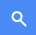
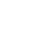
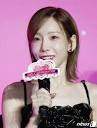
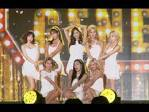
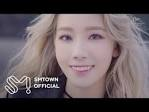
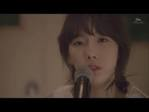
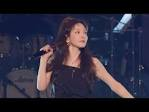
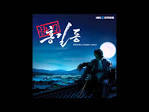
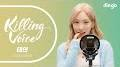
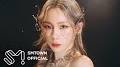

In [84]:
html

In [ ]:
# 여기까지 코드만 이용해서 검색어를 수정해서 다음번 검색결과를 가져온 것.
# 이것이 제일 기본
# 여기서 막히면 안됨
# 안되는 사람은 빨리 해결할 것

In [74]:
urlparse(url)
# 맨 마지막이 아무것도 없어서 None 준 것

ParseResult(scheme='https', netloc='www.google.com', path='/search', params='', query='q=%ED%95%9C%EC%86%8C%ED%9D%AC&rlz=1C5CHFA_enKR1044KR1044&oq=%ED%95%9C%EC%86%8C%ED%9D%AC&aqs=chrome..69i57j46i131i199i433i465i512l2j0i131i433i512j46i131i199i433i465i512l2j0i3j0i131i433i512j46i131i199i433i465i512.1663j0j9&sourceid=chrome&ie=UTF-8', fragment='')

In [124]:
header

{'user-agent': 'mybot'}